<a href="https://colab.research.google.com/github/RomanKunal/PythonLib/blob/main/Missingdata2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mean median imputer


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
data=pd.read_csv("/content/titanic_toy.csv")
data.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
data.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [7]:
X=data.drop(columns=['Survived'])
Y=data['Survived']
#X.head()
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
#X_train.head()
Y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [12]:
X_train.shape
#Y_train.shape

(712, 3)

In [13]:
X_train.isnull().mean()

Age       0.196629
Fare      0.050562
Family    0.000000
dtype: float64

In [14]:
Y_train.isnull().mean()

0.0

In [15]:
mean_age=X_train['Age'].mean()
mean_age

29.498846153846156

In [16]:
agee=data['Age'].mean()
agee

29.69911764705882

In [17]:
median_age=X_train['Age'].median()
mean_fare=X_train['Fare'].mean()
median_fare=X_train['Fare'].median()

In [18]:
X_train['mean_age']=X_train['Age'].fillna(mean_age)
X_train['median_age']=X_train['Age'].fillna(median_age)
X_train['mean_fare']=X_train['Fare'].fillna(mean_fare)
X_train['median_fare']=X_train['Fare'].fillna(median_fare)

In [21]:
X_train.head(10)

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
331,45.5,28.5000,0,45.500000,45.5,28.5000,28.5000
733,23.0,13.0000,0,23.000000,23.0,13.0000,13.0000
382,32.0,7.9250,0,32.000000,32.0,7.9250,7.9250
704,26.0,7.8542,1,26.000000,26.0,7.8542,7.8542
813,6.0,31.2750,6,6.000000,6.0,31.2750,31.2750
118,24.0,247.5208,1,24.000000,24.0,247.5208,247.5208
536,45.0,26.5500,0,45.000000,45.0,26.5500,26.5500
361,29.0,27.7208,1,29.000000,29.0,27.7208,27.7208
29,NaN,7.8958,0,29.498846,28.0,7.8958,7.8958
55,NaN,35.5000,0,29.498846,28.0,35.5000,35.5000


In [20]:
X_train.sample()

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
111,14.5,14.4542,1,14.5,14.5,14.4542,14.4542


In [23]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['median_age'].var())
print('Age Variance after mean imputation: ', X_train['mean_age'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['median_fare'].var())
print('Fare Variance after mean imputation: ', X_train['mean_fare'].var())

Original Age variable variance:  210.2517072477435
Age Variance after median imputation:  169.20731007048155
Age Variance after mean imputation:  168.85193366872227
Original Fare variable variance:  2761.0314349486343
Fare Variance after median imputation:  2637.012481677765
Fare Variance after mean imputation:  2621.232374951235


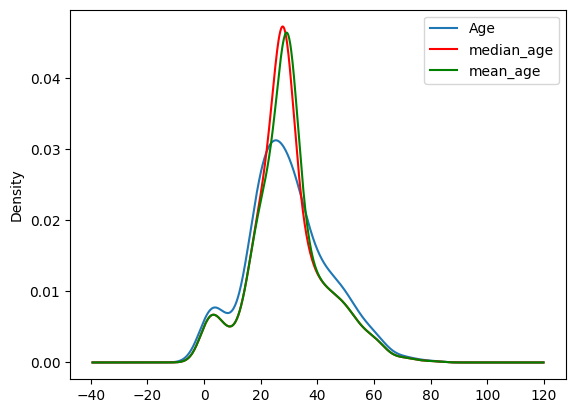

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['median_age'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['mean_age'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [25]:
X_train.cov()

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.193767,70.082085
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.657433,17.672035
mean_age,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,56.282518
median_age,210.251707,63.938058,-5.587710,168.851934,169.207310,60.700688,59.728510
mean_fare,71.193767,2761.031435,17.657433,57.175304,60.700688,2621.232375,2621.232375
median_fare,70.082085,2761.031435,17.672035,56.282518,59.728510,2621.232375,2637.012482


In [26]:
X_train.corr()

,Age,Fare,Family,mean_age,median_age,mean_fare,median_fare
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088944,0.087232
Fare,0.091482,1.000000,0.207193,0.088151,0.093496,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.255307,0.204981,0.204536
mean_age,1.000000,0.088151,-0.256883,1.000000,0.998949,0.085941,0.084346
median_age,1.000000,0.093496,-0.255307,0.998949,1.000000,0.091145,0.089416
mean_fare,0.088944,1.000000,0.204981,0.085941,0.091145,1.000000,0.997003
median_fare,0.087232,1.000000,0.204536,0.084346,0.089416,0.997003,1.000000
